In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport


from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [58]:
#pip install pandas-profiling

In [59]:
df = pd.read_csv("Train.csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [60]:
print(df.columns.values)

['ID' 'Warehouse_block' 'Mode_of_Shipment' 'Customer_care_calls'
 'Customer_rating' 'Cost_of_the_Product' 'Prior_purchases'
 'Product_importance' 'Gender' 'Discount_offered' 'Weight_in_gms'
 'Reached.on.Time_Y.N']


In [61]:
# Missing Value
print(df.isna().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [62]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [63]:
from sklearn import preprocessing

selected_feature = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']

le = preprocessing.LabelEncoder()
for i in selected_feature:
    df[i] = df[i].astype(str)
    df[i] = le.fit_transform(df[i])

In [64]:
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile.to_file("dataset.html")

Text(0.5, 1.0, 'Data Heatmap')

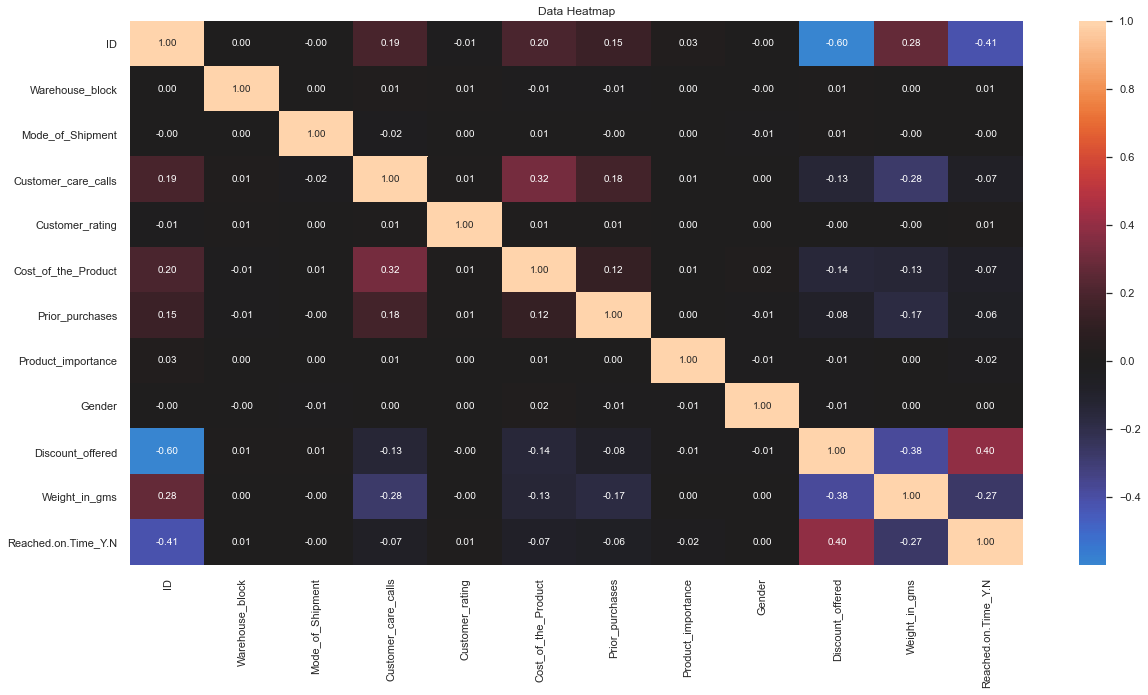

In [65]:
flg, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),center=0,annot=True,fmt=".2f")
ax.set_title('Data Heatmap')

<Figure size 500x1500 with 0 Axes>

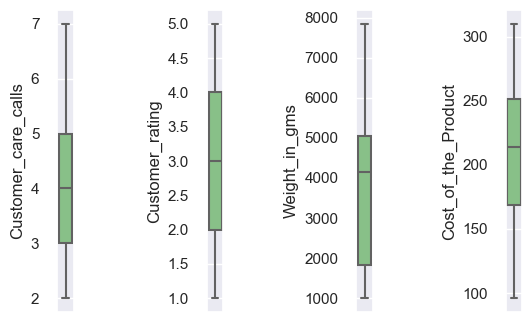

In [66]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 100
plt.figure(figsize=(5,15))
f, axes = plt.subplots(1, 4)
sns.boxplot(y=df["Customer_care_calls"], ax=axes[0])
sns.boxplot(y=df["Customer_rating"], ax=axes[1])
sns.boxplot(y=df["Weight_in_gms"], ax=axes[2])
sns.boxplot(y=df["Cost_of_the_Product"], ax=axes[3])

plt.subplots_adjust(wspace=8)

<Figure size 500x1500 with 0 Axes>

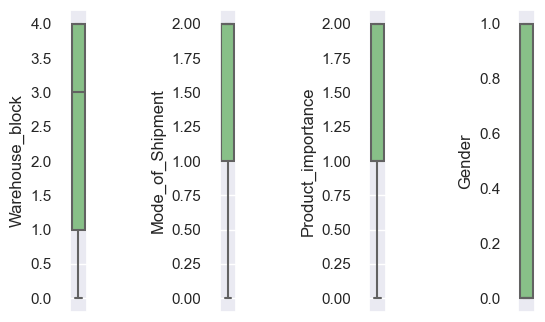

In [67]:
mpl.rcParams['figure.dpi'] = 100
plt.figure(figsize=(5,15))
f, axes = plt.subplots(1, 4)

sns.boxplot(y=df["Warehouse_block"], ax=axes[0])
sns.boxplot(y=df["Mode_of_Shipment"], ax=axes[1])
sns.boxplot(y=df["Product_importance"], ax=axes[2])
sns.boxplot(y=df["Gender"], ax=axes[3])

plt.subplots_adjust(wspace=8)

<Figure size 500x1500 with 0 Axes>

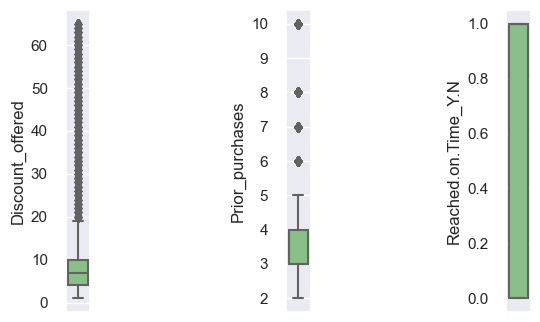

In [68]:
mpl.rcParams['figure.dpi'] = 100
plt.figure(figsize=(5,15))
f, axes = plt.subplots(1, 3)

sns.boxplot(y=df["Discount_offered"], ax=axes[0])
sns.boxplot(y=df["Prior_purchases"], ax=axes[1])
sns.boxplot(y=df["Reached.on.Time_Y.N"], ax=axes[2])

plt.subplots_adjust(wspace=8)

In [69]:
df.drop('ID',inplace=True,axis=1)
df.drop('Discount_offered', inplace=True, axis=1)
df.drop('Prior_purchases', inplace=True, axis=1)

In [70]:
from numpy.random import RandomState

rng = RandomState()
train = df.sample(frac=0.7, random_state=rng)
test = df.loc[~df.index.isin(train.index)]

In [71]:
train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Product_importance,Gender,Weight_in_gms,Reached.on.Time_Y.N
10929,1,2,5,4,232,2,1,1337,0
7690,2,2,4,4,140,2,0,5481,0
4289,4,2,3,3,259,0,0,5939,0
5237,4,2,3,1,176,1,0,4276,0
4760,0,2,6,5,290,2,1,1867,1
...,...,...,...,...,...,...,...,...,...
4153,4,2,3,4,134,1,0,4436,0
6433,4,1,3,4,159,0,1,4756,1
9142,2,2,5,5,223,2,1,1132,0
7287,1,2,3,5,236,1,1,5755,1


In [72]:
test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Product_importance,Gender,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,1,0,1233,1
1,4,0,4,5,216,1,1,3088,1
5,4,0,3,1,162,2,0,1417,1
7,4,0,4,1,233,1,0,2804,1
11,4,0,4,5,232,2,0,3253,1
...,...,...,...,...,...,...,...,...,...
10988,0,2,4,3,192,1,0,1830,0
10991,4,2,5,2,261,2,1,1227,1
10992,3,2,5,1,236,2,1,1906,0
10994,0,2,4,1,252,2,0,1538,1


In [73]:
traintarget = train.iloc[:,[8]]
traintarget.head()

,Reached.on.Time_Y.N
10929,0
7690,0
4289,0
5237,0
4760,1


In [74]:
trainData = train.iloc[:,[0,1,2,3,4,5,6,7]]
trainData.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Product_importance,Gender,Weight_in_gms
10929,1,2,5,4,232,2,1,1337
7690,2,2,4,4,140,2,0,5481
4289,4,2,3,3,259,0,0,5939
5237,4,2,3,1,176,1,0,4276
4760,0,2,6,5,290,2,1,1867


In [75]:
#Normalisasi data
trainData_N = MinMaxScaler(feature_range=(0,1)).fit_transform(trainData)
trainData_N

array([[0.25      , 1.        , 0.6       , ..., 1.        , 1.        ,
        0.04908692],
       [0.5       , 1.        , 0.4       , ..., 1.        , 0.        ,
        0.65449233],
       [1.        , 1.        , 0.2       , ..., 0.        , 0.        ,
        0.72140248],
       ...,
       [0.5       , 1.        , 0.6       , ..., 1.        , 1.        ,
        0.01913806],
       [0.25      , 1.        , 0.2       , ..., 0.5       , 1.        ,
        0.69452155],
       [0.        , 1.        , 0.2       , ..., 1.        , 1.        ,
        0.35909423]])

In [76]:
testtarget = test.iloc[:,[8]]
testtarget.head()

,Reached.on.Time_Y.N
0,1
1,1
5,1
7,1
11,1


In [77]:
testData = test.iloc[:,[0,1,2,3,4,5,6,7]]
testData.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Product_importance,Gender,Weight_in_gms
0,3,0,4,2,177,1,0,1233
1,4,0,4,5,216,1,1,3088
5,4,0,3,1,162,2,0,1417
7,4,0,4,1,233,1,0,2804
11,4,0,4,5,232,2,0,3253


In [78]:
#Normalisasi Data
testData_N = MinMaxScaler(feature_range=(0,1)).fit_transform(testData)
testData_N

array([[0.75      , 0.        , 0.4       , ..., 0.5       , 0.        ,
        0.03522089],
       [1.        , 0.        , 0.4       , ..., 0.5       , 1.        ,
        0.31683619],
       [1.        , 0.        , 0.2       , ..., 1.        , 0.        ,
        0.0631547 ],
       ...,
       [0.75      , 1.        , 0.6       , ..., 1.        , 1.        ,
        0.13739183],
       [0.        , 1.        , 0.4       , ..., 1.        , 0.        ,
        0.08152421],
       [0.25      , 1.        , 0.4       , ..., 1.        , 0.        ,
        0.03734629]])

In [79]:
from sklearn.neighbors import KNeighborsClassifier

k = 8

KNN = KNeighborsClassifier(n_neighbors=k).fit(trainData_N,traintarget)
KNN

<ipython-input-79-722efc6cf631>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KNN = KNeighborsClassifier(n_neighbors=k).fit(trainData_N,traintarget)


KNeighborsClassifier(n_neighbors=8)

In [80]:
KNNPredict = KNN.predict(testData_N)
KNNPredict

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [81]:
accuracyArr = []
confusionmatrixArr = []
classificationreportArr = []

In [82]:
# KNN
from sklearn import metrics

confusionmatrix = metrics.confusion_matrix(testtarget, KNNPredict)
classificationreport = metrics.classification_report(testtarget, KNNPredict)
accuracy = metrics.accuracy_score(testtarget, KNNPredict)

confusionmatrixArr.append(confusionmatrix)
classificationreportArr.append(classificationreport)
accuracyArr.append(accuracy)

print("Confusion Matrix:","\n",confusionmatrix)
print("\nClassification Report:\n",classificationreport)
print("\nAccuracy:", accuracy)

Confusion Matrix: 
 [[ 861  450]
 [ 796 1193]]

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.66      0.58      1311
           1       0.73      0.60      0.66      1989

    accuracy                           0.62      3300
   macro avg       0.62      0.63      0.62      3300
weighted avg       0.64      0.62      0.63      3300


Accuracy: 0.6224242424242424


In [83]:
#Logistic Regression

LogisticRegression = LogisticRegression().fit(trainData_N,traintarget)
LogisticRegression

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [84]:
LogisticRegressionPredict = LogisticRegression.predict(testData_N)
LogisticRegressionPredict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [85]:
# Logistic Regression
confusionmatrix = metrics.confusion_matrix(testtarget, LogisticRegressionPredict)
classificationreport = metrics.classification_report(testtarget, LogisticRegressionPredict)
accuracy = metrics.accuracy_score(testtarget, LogisticRegressionPredict)

confusionmatrixArr.append(confusionmatrix)
classificationreportArr.append(classificationreport)
accuracyArr.append(accuracy)

print("Confusion Matrix:","\n",confusionmatrix)
print("\nClassification Report:\n",classificationreport)
print("\nAccuracy:", accuracy)

Confusion Matrix: 
 [[ 614  697]
 [ 534 1455]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.47      0.50      1311
           1       0.68      0.73      0.70      1989

    accuracy                           0.63      3300
   macro avg       0.61      0.60      0.60      3300
weighted avg       0.62      0.63      0.62      3300


Accuracy: 0.626969696969697


In [86]:
ArrMethod = ['KNN','Logistic Regression']

accuracyV = pd.DataFrame(accuracyArr, columns=['Akurasi'])
accuracyV['Metode']=ArrMethod
accuracyV = accuracyV.sort_values(by='Akurasi', ascending=False)
accuracyV

,Akurasi,Metode
1,0.626970,Logistic Regression
0,0.622424,KNN


<AxesSubplot:xlabel='Metode', ylabel='Akurasi'>

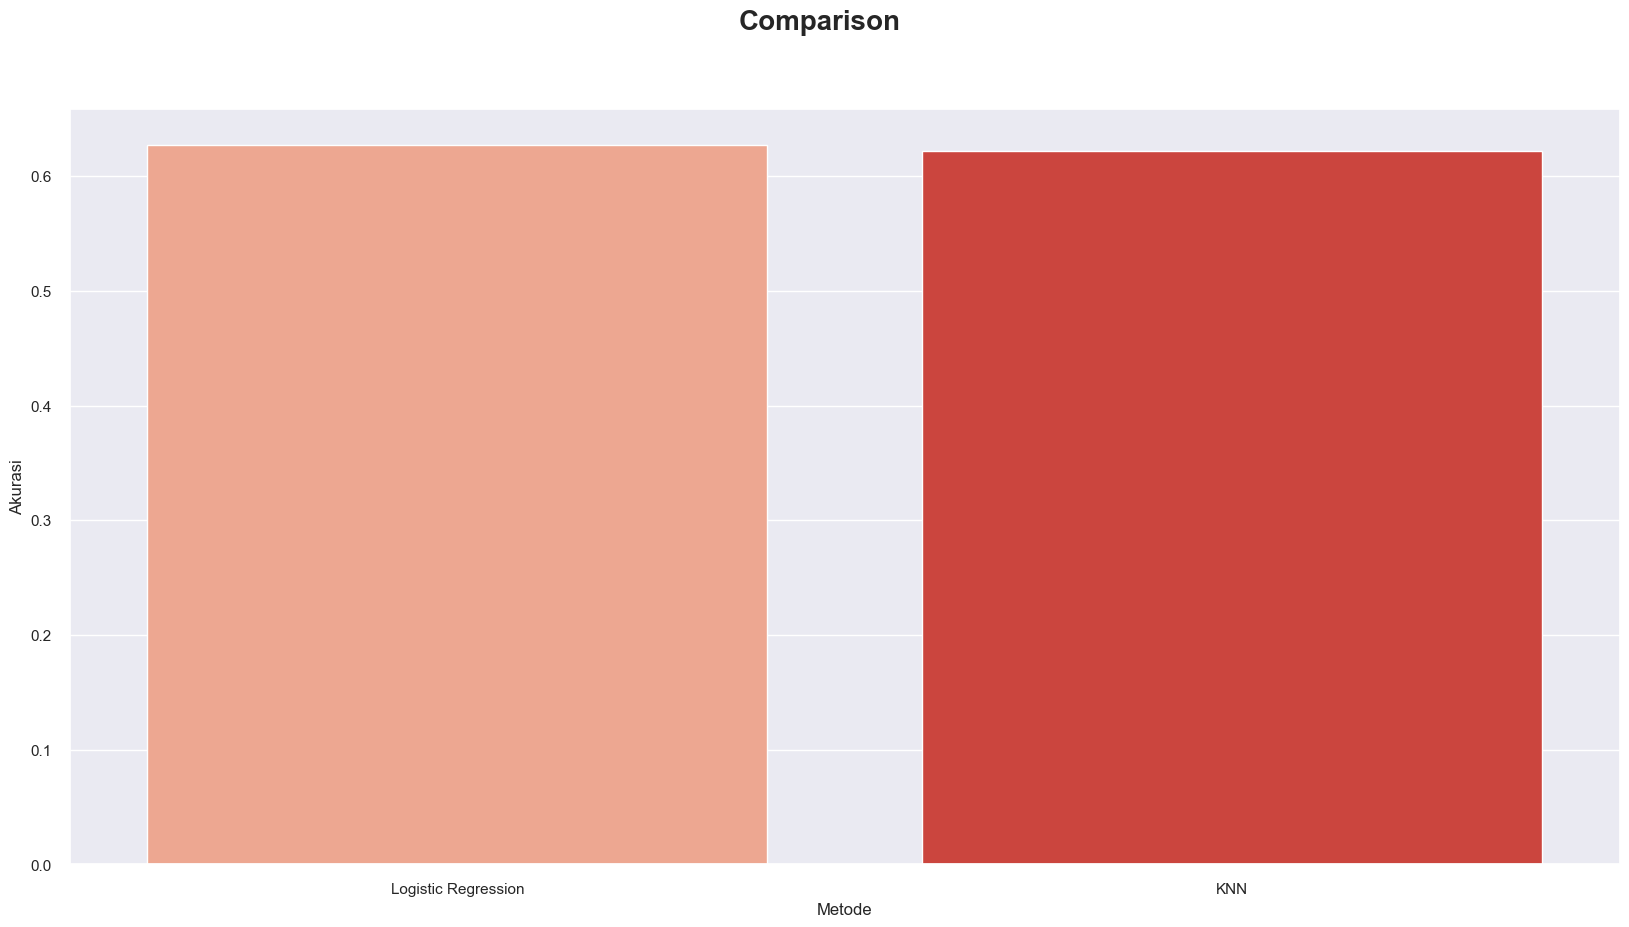

In [87]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')
sns.set(rc={'figure.facecolor':'white'})
sns.set_palette('Accent')

fig, (ax1) = plt.subplots(1)
fig.suptitle('Comparison', fontsize=20, fontweight='bold')
fig.set_figheight(10)
fig.set_figwidth(20)
fig.set_facecolor('white')
sns.barplot(data=accuracyV, x='Metode',y='Akurasi',palette = "Reds")

In [88]:
import random
Warehouse_block = random.randint(0,4)
Mode_of_Shipment = random.randint(0,2)
Customer_care_calls = random.randint(1,7)
Customer_rating = random.randint(1,5)
Cost_of_the_Product = random.randint(100,350) 
Product_importance = random.randint(1,3)
Gender = random.randint(0,1)
Weight_in_gms = random.randint(1000,7000)

x_new = np.array([Warehouse_block, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Product_importance, Gender, Weight_in_gms]).reshape(1, -1)
x_new

array([[   0,    1,    3,    1,  123,    3,    1, 4859]])

In [89]:
y_new = KNN.predict(x_new)
y_new

array([1], dtype=int64)

In [90]:
y_new = LogisticRegression.predict(x_new)
y_new

array([0], dtype=int64)